## CLASSIFICATION & DECISION BOUNDARY

### Optimization and Evaluation of a Deep Learning Model (Neural Network)  for Classification

##### HEMANT THAPA

#### LIBRARIES 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics as st
import yfinance as yf
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#### What is classification ? 

A Machine Learning Techiques to identify the category of new obesrvation base on trained data.

Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

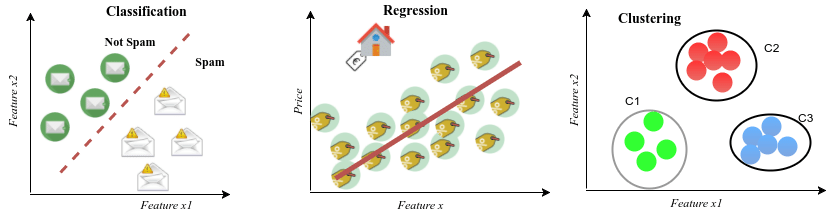

#### Predict a categorical dependent varibles from a number of independent variables. 

Predicting the class or category of a case is a fundamental task in machine learning and artificial intelligence. It involves determining which group or category a particular instance belongs to based on its features or attributes. The goal is to build a model that can automatically assign cases to their respective classes with a certain level of accuracy.

#### There are two main types of classification problems, based on the number of classes involved:

Simple Classification / Binary Classification:
In this type of problem, there are only two possible classes or categories that an instance can belong to. It's essentially a yes-no or true-false type of prediction. For instance, you might be predicting whether an email is spam (class 1) or not spam (class 0), whether a customer will buy a product (class 1) or not buy (class 0), and so on.

Multi-Class Classification:
In this type of problem, there are more than two possible classes or categories that an instance can belong to. The task is to assign the correct label among several options. For example, you might predict the genre of a movie from categories like action, comedy, drama, science fiction, etc. Another example is classifying different types of animals, like cats, dogs, and birds.

#### CREATING DATASET

In [5]:
data_dict = {
    "Age": [25, 32, 45, 28, 38,
            22, 29, 31, 27, 40, 
            33, 41, 26, 35, 48, 
            30, 36, 23, 42, 39],
    
    "Estimated Salary": [50000, 72000, 90000, 55000, 80000, 
                         48000, 60000, 75000, 52000, 85000, 
                         67000, 89000, 51000, 68000, 92000, 
                         58000, 70000, 49000, 83000, 77000],
    
    "Purchased": [0, 1, 1, 0, 0, 
                  0, 1, 1, 0, 1, 
                  1, 1, 0, 1, 1, 
                  0, 1, 0, 1, 1]
}

#### CREATING DATAFRAME

In [6]:
df = pd.DataFrame(data_dict)

In [7]:
df

,Age,Estimated Salary,Purchased
0,25,50000,0
1,32,72000,1
2,45,90000,1
3,28,55000,0
4,38,80000,0
5,22,48000,0
6,29,60000,1
7,31,75000,1
8,27,52000,0
9,40,85000,1


In [8]:
len(df)

20

#### FEATURE AND TARGET VARIABLE SELECTION

1. Features (Independent Variables): Features are the input variables or attributes that are used to describe the data and provide information to a machine learning algorithm. They are the characteristics or properties of the data points that the model uses to make predictions or classifications. For example, in a housing price prediction model, features could include variables like the number of bedrooms, square footage, location, and so on.






2. Target (Dependent Variable): The target variable, also known as the dependent variable, is the variable that you want the machine learning model to predict or classify. It is the output you are trying to estimate or analyze based on the input features. Using the housing price prediction example, the target variable would be the actual sale price of the house. The model learns to make predictions or classifications based on the patterns it identifies between the features and the target variable.

In [9]:
X = df.iloc[:, 0:2]

In [10]:
X = X.values.reshape(-2,2)

In [11]:
X[:5]

array([[   25, 50000],
       [   32, 72000],
       [   45, 90000],
       [   28, 55000],
       [   38, 80000]])

In [12]:
y = df.iloc[:,2:3]

In [13]:
y = y.values.reshape(-1,1)

In [14]:
y[:5]

array([[0],
       [1],
       [1],
       [0],
       [0]])

#### SPLITING DATA FOR TRAINING AND TESTING

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=False)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.01659537, -0.06169184],
       [-1.34422477, -1.24617516],
       [-0.54764713, -0.52232424],
       [ 0.24893051,  0.00411279],
       [ 0.64721933,  0.79376833],
       [ 1.57655992,  1.45181462],
       [-1.47698771, -1.31197978],
       [ 1.97484874,  1.58342388],
       [ 0.91274522,  1.12279148],
       [-0.28212125,  0.46474519],
       [ 0.38169345,  0.13572205],
       [ 1.04550816,  1.38600999],
       [-0.68041007, -0.85134738],
       [-1.07869889, -1.18037053],
       [-0.41488419, -0.6539335 ],
       [-0.94593595, -1.1145659 ]])

In [18]:
X_test_scaled

array([[ 1.1782711 ,  0.99118222],
       [-0.14935831,  0.2673313 ],
       [ 0.77998227,  0.59635445],
       [-0.81317301, -1.04876127]])

In [19]:
print(X_train.shape)
print(y_train.shape)

(16, 2)
(16, 1)


In [20]:
print(X_test.shape)
print(y_test.shape)

(4, 2)
(4, 1)


#### TRAINING MODEL

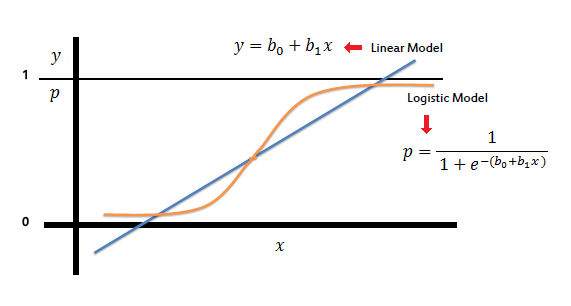

In [21]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

#### PREDICTING OUTPUT

In [22]:
y_pred = model.predict(X_test_scaled)

In [23]:
len(y_pred)

4

In [24]:
y_pred

array([1, 1, 1, 0])

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


#### DECISION BOUNDARY

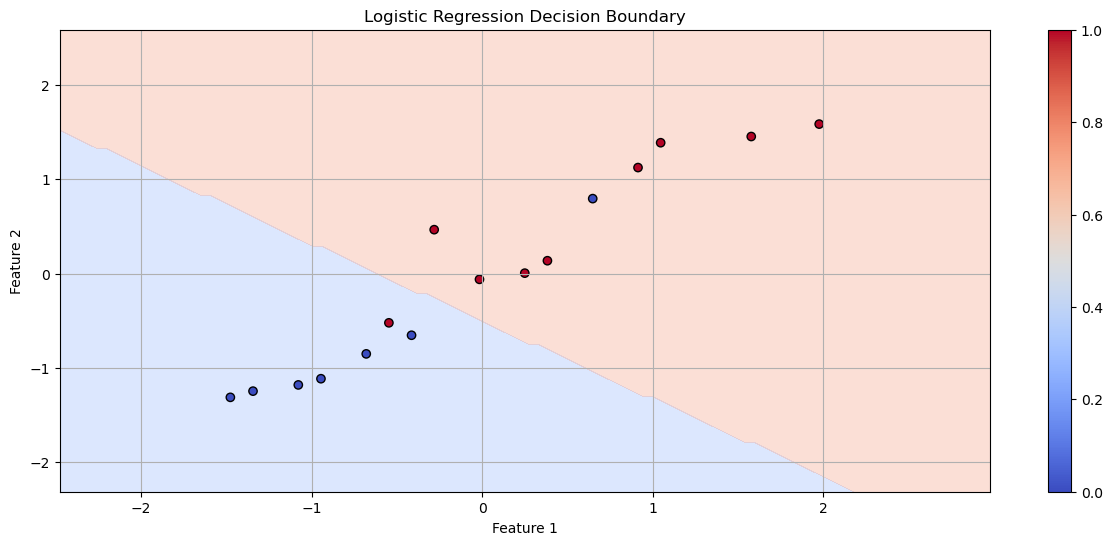

In [26]:
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 100),
                     np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 6))
plt.contourf(xx, yy, Z, levels=1, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.colorbar()
plt.show()

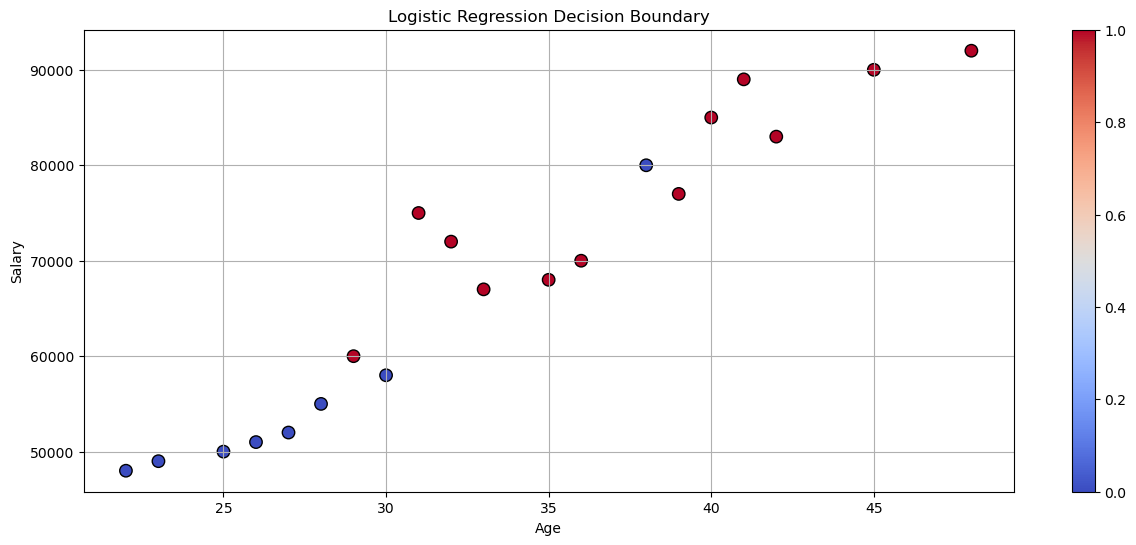

In [27]:
plt.figure(figsize=(15, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=80)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.colorbar()
plt.show()

#### DESIGNING LOG MODEL

##### Defining Independent and Dependent Variables.

In [28]:
X = np.array([data_dict["Age"], data_dict["Estimated Salary"]])

In [29]:
X[:5]

array([[   25,    32,    45,    28,    38,    22,    29,    31,    27,
           40,    33,    41,    26,    35,    48,    30,    36,    23,
           42,    39],
       [50000, 72000, 90000, 55000, 80000, 48000, 60000, 75000, 52000,
        85000, 67000, 89000, 51000, 68000, 92000, 58000, 70000, 49000,
        83000, 77000]])

In [30]:
X = X.T
X

array([[   25, 50000],
       [   32, 72000],
       [   45, 90000],
       [   28, 55000],
       [   38, 80000],
       [   22, 48000],
       [   29, 60000],
       [   31, 75000],
       [   27, 52000],
       [   40, 85000],
       [   33, 67000],
       [   41, 89000],
       [   26, 51000],
       [   35, 68000],
       [   48, 92000],
       [   30, 58000],
       [   36, 70000],
       [   23, 49000],
       [   42, 83000],
       [   39, 77000]])

In [31]:
y = np.array(data_dict["Purchased"])

In [32]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

#### Spliting data for training and testing.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
print(X_train_scaled)

[[-0.01659537 -0.06169184]
 [-1.34422477 -1.24617516]
 [-0.54764713 -0.52232424]
 [ 0.24893051  0.00411279]
 [ 0.64721933  0.79376833]
 [ 1.57655992  1.45181462]
 [-1.47698771 -1.31197978]
 [ 1.97484874  1.58342388]
 [ 0.91274522  1.12279148]
 [-0.28212125  0.46474519]
 [ 0.38169345  0.13572205]
 [ 1.04550816  1.38600999]
 [-0.68041007 -0.85134738]
 [-1.07869889 -1.18037053]
 [-0.41488419 -0.6539335 ]
 [-0.94593595 -1.1145659 ]]


In [36]:
print(X_test_scaled)

[[ 1.1782711   0.99118222]
 [-0.14935831  0.2673313 ]
 [ 0.77998227  0.59635445]
 [-0.81317301 -1.04876127]]


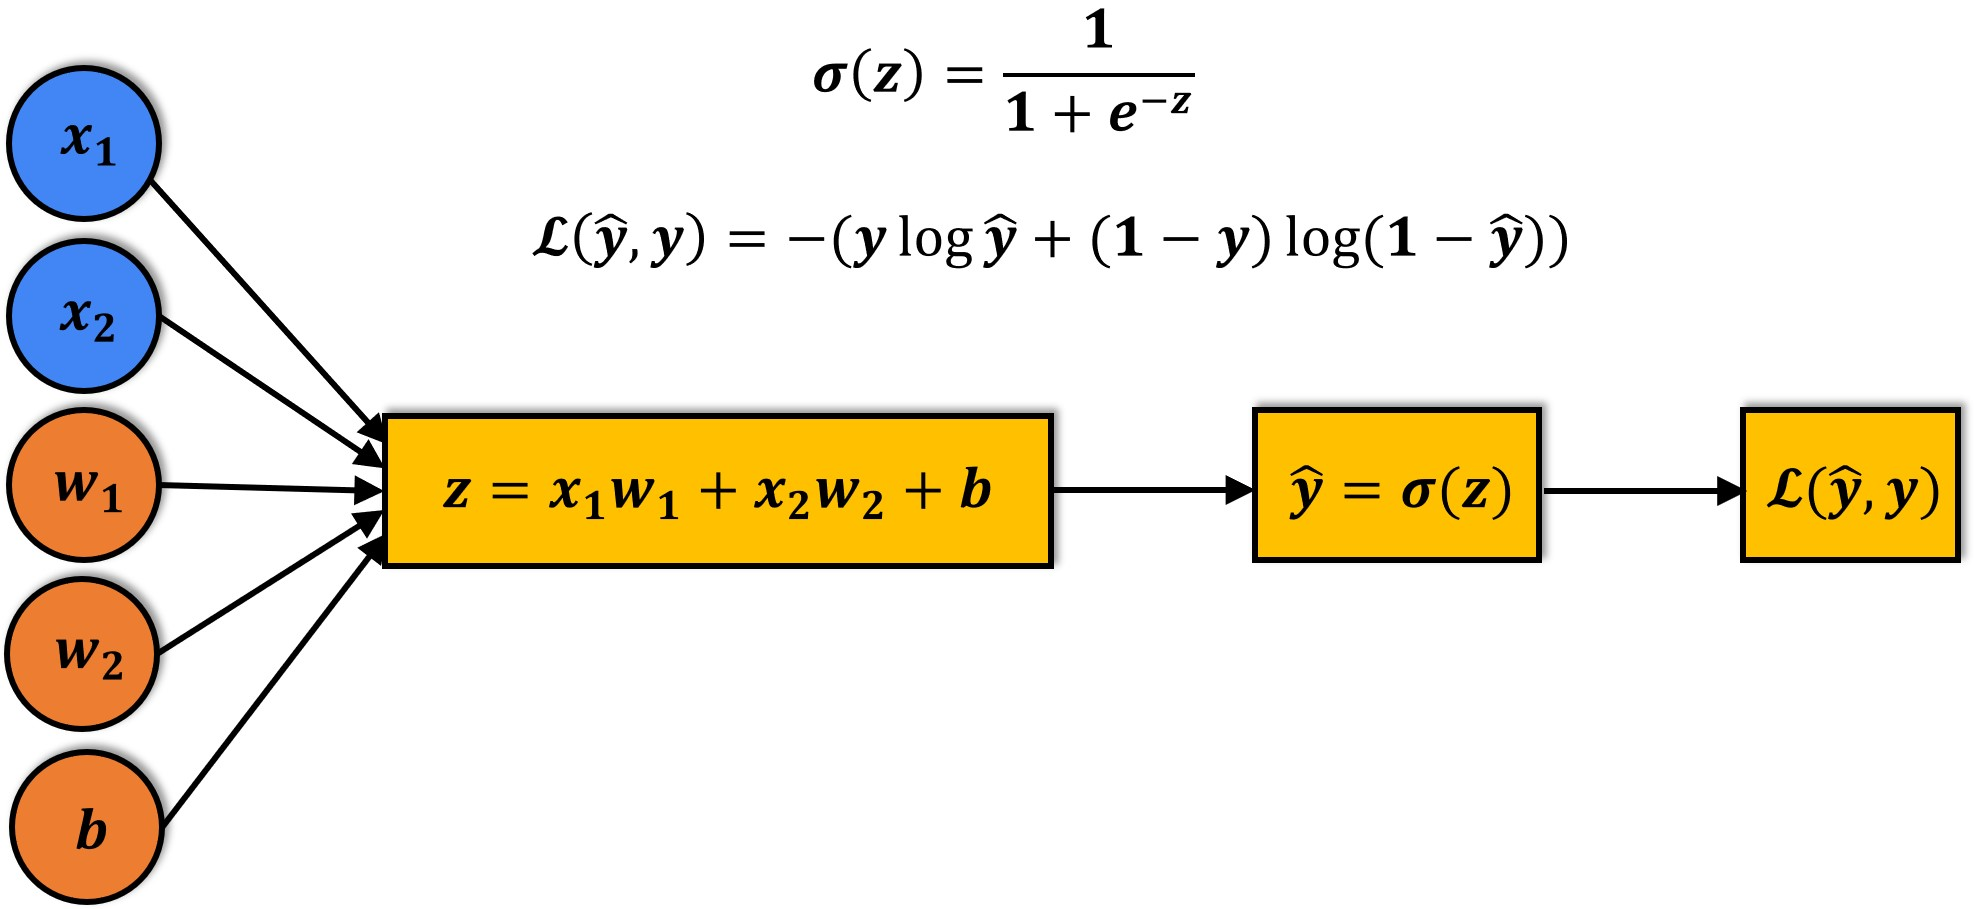

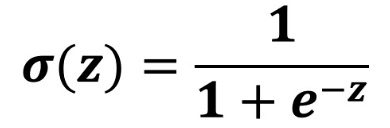


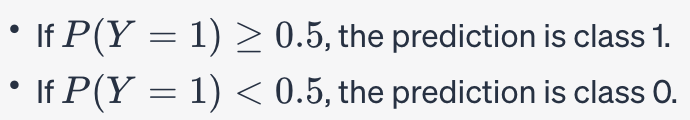

#### Sigmoid function implements the sigmoid activation function, which is used to convert the linear combination of features into probabilities between 0 and 1.

In [37]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

num_samples is the number of data points, num_features is the number of features, and theta initializes the coefficients (parameters) of the logistic regression model, including an intercept term. 

X_with_intercept adds a column of ones to the feature matrix, which represents the intercept term in the linear combination.

In [38]:
num_samples, num_features = X_train.shape
# Coefficients 
theta = np.zeros(num_features + 1) 
#intercept term
X_train_with_intercept = np.c_[np.ones(num_samples), X_train]  

In [39]:
num_samples

16

In [40]:
num_features

2

In [41]:
theta

array([0., 0., 0.])

In [42]:
X_train_with_intercept

array([[1.0e+00, 3.3e+01, 6.7e+04],
       [1.0e+00, 2.3e+01, 4.9e+04],
       [1.0e+00, 2.9e+01, 6.0e+04],
       [1.0e+00, 3.5e+01, 6.8e+04],
       [1.0e+00, 3.8e+01, 8.0e+04],
       [1.0e+00, 4.5e+01, 9.0e+04],
       [1.0e+00, 2.2e+01, 4.8e+04],
       [1.0e+00, 4.8e+01, 9.2e+04],
       [1.0e+00, 4.0e+01, 8.5e+04],
       [1.0e+00, 3.1e+01, 7.5e+04],
       [1.0e+00, 3.6e+01, 7.0e+04],
       [1.0e+00, 4.1e+01, 8.9e+04],
       [1.0e+00, 2.8e+01, 5.5e+04],
       [1.0e+00, 2.5e+01, 5.0e+04],
       [1.0e+00, 3.0e+01, 5.8e+04],
       [1.0e+00, 2.6e+01, 5.1e+04]])

These lines set hyperparameters for the gradient descent optimization process. learning_rate determines the step size in each iteration, and num_iterations specifies the number of iterations to perform.

In [43]:
# Hyperparameters
learning_rate = 0.001
num_iterations = 10000

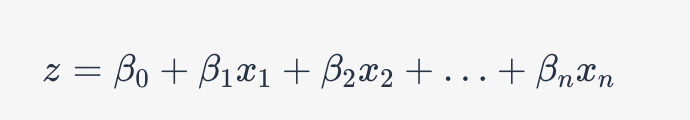

### β0,β1,…,βn : are the coefficients (parameters) of the model.

### x1,x2,…,xn : are the input features.

This loop implements gradient descent to optimize the model's coefficients (theta). In each iteration, it calculates the linear combination z, applies the sigmoid function to get predicted probabilities h, calculates the gradient of the cost function, and updates theta using the gradient and learning rate.

h is the model's predicted probability for the positive class (class 1), and it's used to calculate the difference between these predicted probabilities and the actual labels (y) to compute the gradient for gradient descent optimization.

In [44]:
for _ in range(num_iterations):
    z = np.dot(X_train_with_intercept, theta)
    h = sigmoid(z)
    gradient = np.dot(X_train_with_intercept.T, (h - y_train)) / num_samples
    theta -= learning_rate * gradient

In [45]:
z

array([ -894060.208    ,  -653864.168625 ,  -800650.54225  ,
        -907405.665875 , -1067533.2276875, -1200976.70525  ,
        -640519.5646875, -1227666.7670625, -1134253.6855625,
       -1000808.500125 ,  -934094.0198125, -1187629.5395   ,
        -733930.9383125,  -667209.6265   ,  -773963.8961875,
        -680554.2304375])

In [46]:
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
gradient

array([-5.6250e-01, -2.1125e+01, -4.3500e+04])

In [48]:
theta

array([-0.7775   , -0.8328125, 30.15625  ])

In [49]:
X_test_with_intercept = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
y_pred = (sigmoid(np.dot(X_test_with_intercept, theta)) >= 0.5).astype(int)

In [50]:
y_pred

array([1, 1, 1, 0])

In [51]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

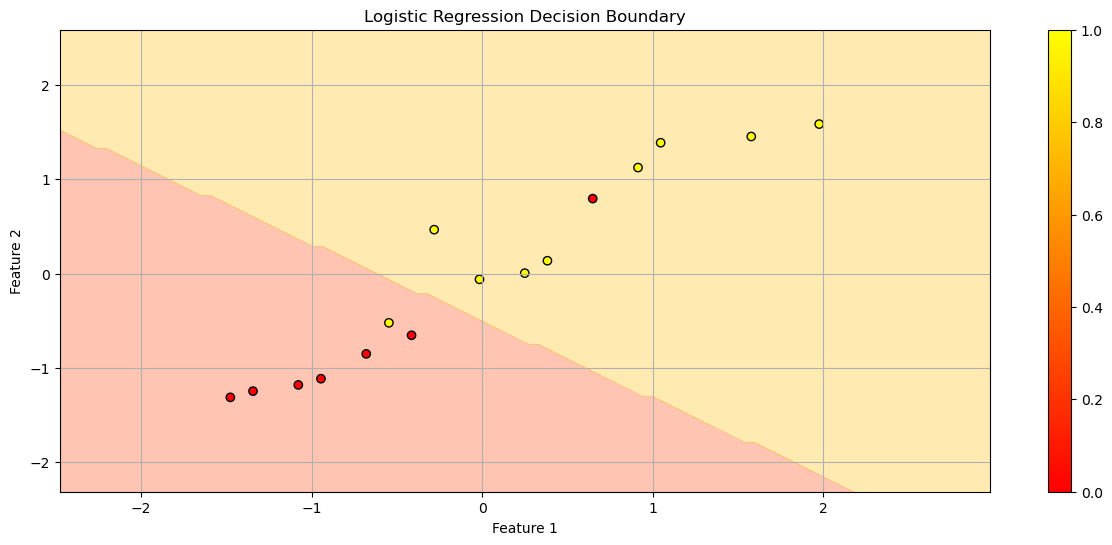

In [52]:
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 100),
                     np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 6))
plt.contourf(xx, yy, Z, levels=1, cmap=plt.cm.autumn, alpha=0.3)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.autumn, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.colorbar()
plt.show()

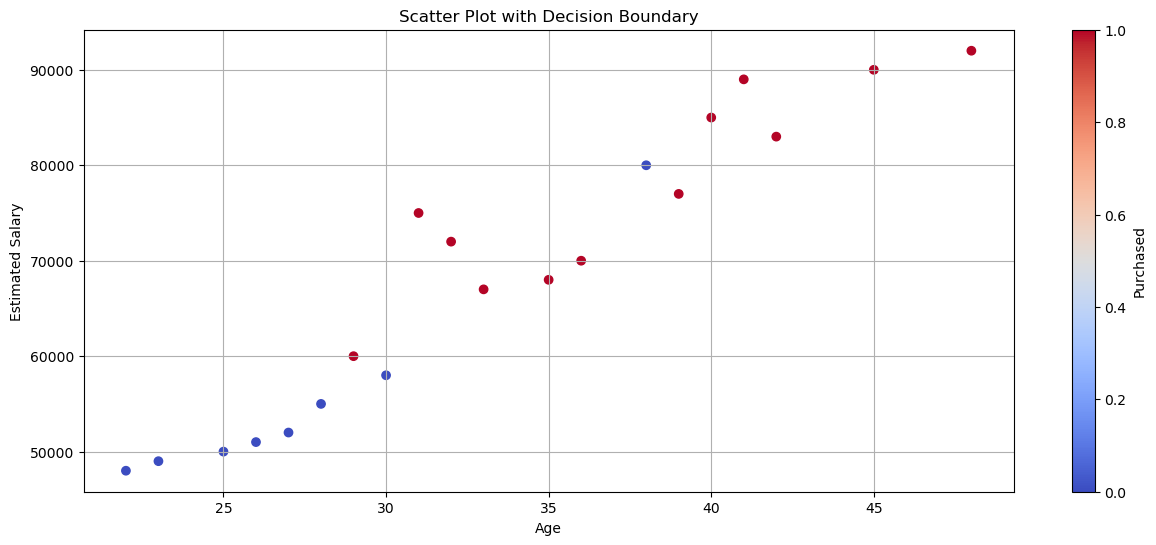

In [53]:
plt.figure(figsize=(15, 6))
plt.scatter(data_dict["Age"], data_dict["Estimated Salary"], c=data_dict["Purchased"], cmap="coolwarm", marker="o")
plt.colorbar(label="Purchased")
plt.title("Scatter Plot with Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()

In [54]:
# Evaluate the model
correct_predictions = 0
for i in range(num_samples):
    predicted_class = 1 if sigmoid(np.dot(X_train_with_intercept[i], theta)) >= 0.5 else 0
    if predicted_class == y_train[i]:
        correct_predictions += 1

accuracy = correct_predictions / num_samples
print(f"Training Accuracy: {accuracy:.2%}")

Training Accuracy: 56.25%


In [55]:
# Predictions on test data
X_test_with_intercept = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
correct_predictions = 0
for i in range(X_test_scaled.shape[0]):
    predicted_class = 1 if sigmoid(np.dot(X_test_with_intercept[i], theta)) >= 0.5 else 0
    if predicted_class == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / X_test_scaled.shape[0]
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 100.00%


## NEURAL NETWORK

In [56]:
data_dict = {
    "Age": [25, 32, 45, 28, 38,
            22, 29, 31, 27, 40, 
            33, 41, 26, 35, 48, 
            30, 36, 23, 42, 39],
    
    "Estimated Salary": [50000, 72000, 90000, 55000, 80000, 
                         48000, 60000, 75000, 52000, 85000, 
                         67000, 89000, 51000, 68000, 92000, 
                         58000, 70000, 49000, 83000, 77000],
    
    "Purchased": [0, 1, 1, 0, 0, 
                  0, 1, 1, 0, 1, 
                  1, 1, 0, 1, 1, 
                  0, 1, 0, 1, 1]
}

In [57]:
X = np.array([data_dict["Age"], data_dict["Estimated Salary"]]).T
y = np.array(data_dict["Purchased"])

In [58]:
X[:5]

array([[   25, 50000],
       [   32, 72000],
       [   45, 90000],
       [   28, 55000],
       [   38, 80000]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Hidden Layer Calculation:
The hidden layer has a weight matrix W₁ and a bias vector b₁. The output of the hidden layer can be calculated using the rectified linear unit (ReLU) activation function:

z₁ = W₁ ⋅ X + b₁
a₁ = ReLU(z₁)

#### Output Layer Calculation:
The output layer has a weight matrix W₂ and a bias vector b₂. The output of the output layer is calculated using the sigmoid activation function for binary classification:

z₂ = W₂ ⋅ a₁ + b₂
ŷ = σ(z₂)

#### Where:
X is the input data point with features x₁ and x₂.
z₁ is the pre-activation value of the hidden layer.
a₁ is the output of the hidden layer after applying the ReLU activation function.
W₁ is the weight matrix of the hidden layer.
b₁ is the bias vector of the hidden layer.
z₂ is the pre-activation value of the output layer.
ŷ is the predicted output of the neural network.
W₂ is the weight matrix of the output layer.
b₂ is the bias vector of the output layer.
σ(z) is the sigmoid activation function.


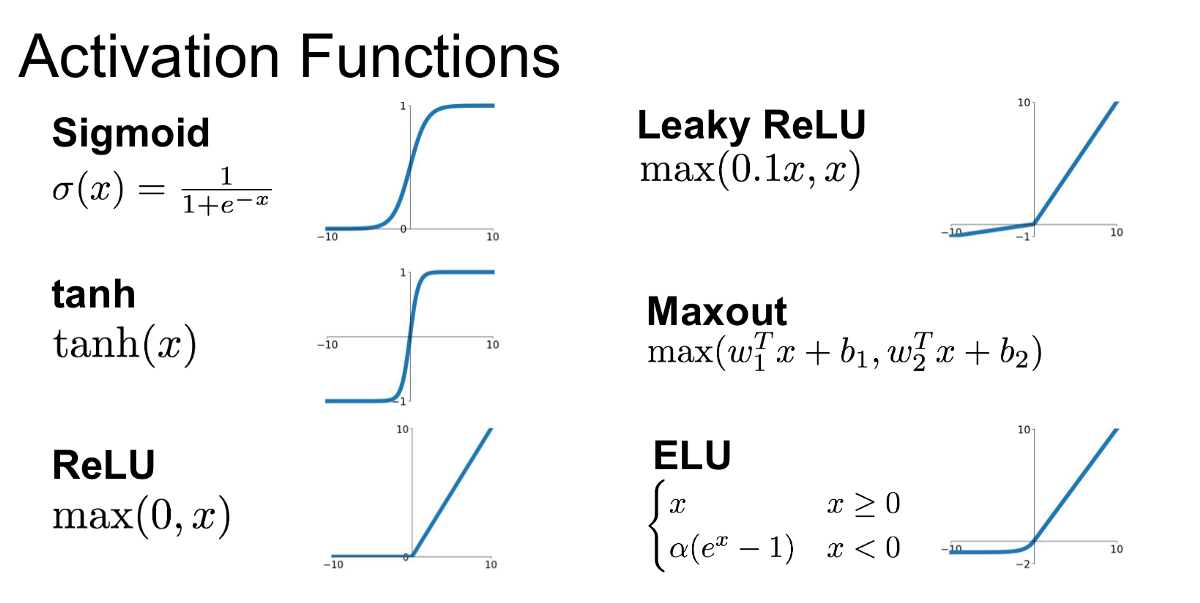

#### The ReLU (Rectified Linear Unit) is a widely used activation function in neural networks that introduces non-linearity to the network. It operates as follows:

1. Calculation of z₁:
   In a neural network's hidden layer, each neuron receives input from the previous layer's neurons. The input is a linear combination of the input data (X) and associated weights (W₁), plus a bias term (b₁):
   
   z₁ = W₁ ⋅ X + b₁
   
2. Application of ReLU Activation:
   The ReLU activation function is applied element-wise to the pre-activation values (z₁). It is defined as:
   
   ReLU(x) = max(0, x)
   
   For each element in the pre-activation vector, ReLU outputs the element itself if positive, and 0 if negative:
   
   a₁ = ReLU(z₁) = max(0, z₁)
   
ReLU introduces non-linearity by preserving positive values and setting negatives to 0. This non-linearity is crucial for the network to learn complex data patterns.

ReLU enhances neural networks by applying the max(0, x) function to pre-activation values, enabling the network to capture intricate relationships in the data.


In [61]:
# Build a simple deep learning model using TensorFlow and Keras
model = tf.keras.Sequential([
    # Input layer with shape (2,)
    tf.keras.layers.Input(shape=(2,)),
     # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
     # Output layer with 1 unit and sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [62]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 51ms/step - loss: 0.6854 - accuracy: 0.5000 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 58ms/step - loss: 0.6787 - accuracy: 0.5625 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 49ms/step - loss: 0.6721 - accuracy: 0.5625 - val_loss: 0.6717 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 0.6656 - accuracy: 0.7500 - val_loss: 0.6641 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6591 - accuracy: 0.8125 - val_loss: 0.6565 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 53ms/step - loss: 0.6528 - accuracy: 0.8125 - val_loss: 0.6491 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=====

1/1 [==============================] - 0s 78ms/step - loss: 0.4506 - accuracy: 0.8750 - val_loss: 0.3744 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 51ms/step - loss: 0.4486 - accuracy: 0.8750 - val_loss: 0.3709 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 61ms/step - loss: 0.4467 - accuracy: 0.8750 - val_loss: 0.3675 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 56ms/step - loss: 0.4448 - accuracy: 0.8750 - val_loss: 0.3642 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 53ms/step - loss: 0.4429 - accuracy: 0.8750 - val_loss: 0.3609 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 0s 59ms/step - loss: 0.4411 - accuracy: 0.8750 - val_loss: 0.3576 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 0s 48ms/step - loss: 0.4393 - accuracy: 0.8750 - val_loss: 0.3544 - val_accuracy: 1.0000
Epoch 66/100
1/1 [========

The provided output indicates that the model is training and evaluating successfully. The training accuracy is increasing over epochs, and the validation accuracy is also high, indicating that the model is performing well.

The training loss is decreasing over epochs, which is a positive sign, indicating that the model is learning from the data. Similarly, the validation loss is decreasing, which indicates that the model is not overfitting.

The final accuracy on the validation (test) set is 100%, which indicates that the model is performing very well on the provided data. However, achieving 100% accuracy on real-world data is uncommon and could indicate that the dataset is very small or simple.

In [64]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) >= 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

1/1 [==============================] - 0s 80ms/step
Test Accuracy: 100.00%


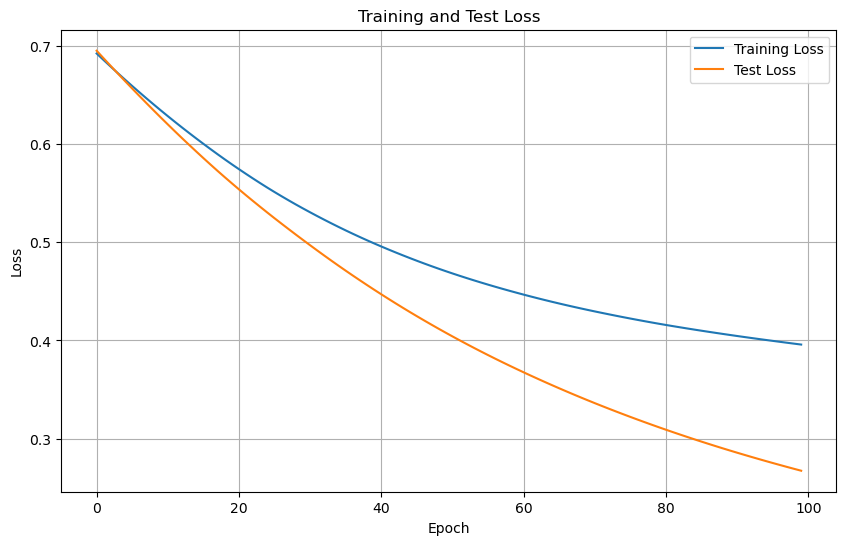

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

4025/4025 [==============================] - 6s 2ms/step


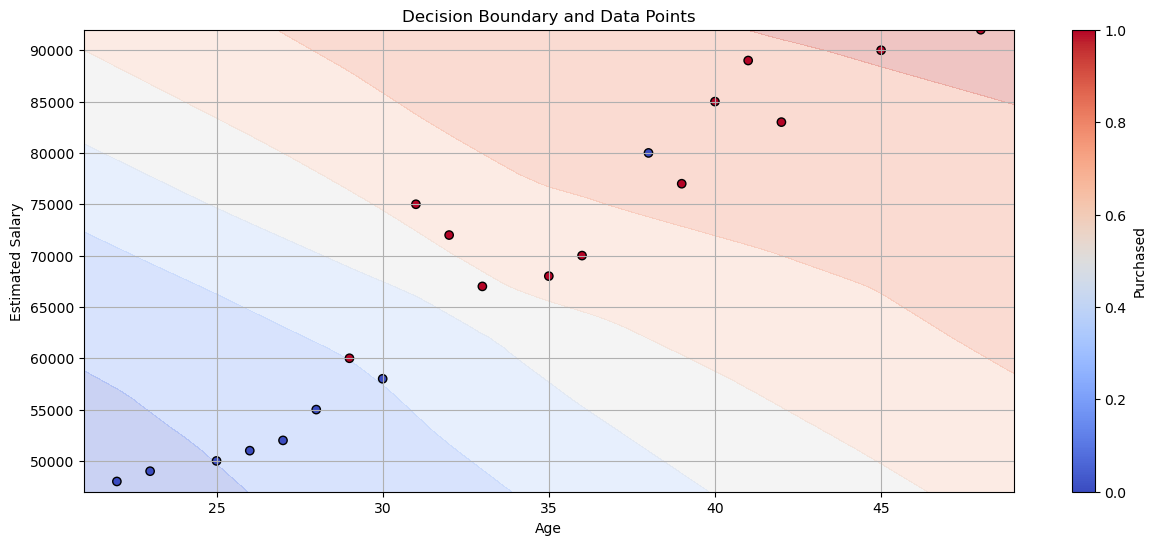

In [66]:
plt.figure(figsize=(15, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1000, X[:, 1].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 1000))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", marker="o", edgecolors='k')
plt.colorbar(label="Purchased")
plt.title("Decision Boundary and Data Points")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()

## OPTIMISATION 

In [86]:
data_dict = {
    "Age": [25, 32, 45, 28, 38,
            22, 29, 31, 27, 40, 
            33, 41, 26, 35, 48, 
            30, 36, 23, 42, 39],
    
    "Estimated Salary": [50000, 72000, 90000, 55000, 80000, 
                         48000, 60000, 75000, 52000, 85000, 
                         67000, 89000, 51000, 68000, 92000, 
                         58000, 70000, 49000, 83000, 77000],
    
    "Purchased": [0, 1, 1, 0, 0, 
                  0, 1, 1, 0, 1, 
                  1, 1, 0, 1, 1, 
                  0, 1, 0, 1, 1]
}

In [87]:
X = np.array([data_dict["Age"], data_dict["Estimated Salary"]]).T
y = np.array(data_dict["Purchased"])

In [88]:
X[:5]

array([[   25, 50000],
       [   32, 72000],
       [   45, 90000],
       [   28, 55000],
       [   38, 80000]])

In [104]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=False)

In [105]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [106]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [107]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

In [109]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.0151 - accuracy: 0.2500 - val_loss: 1.2070 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 52ms/step - loss: 1.6714 - accuracy: 0.3125 - val_loss: 1.1961 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 80ms/step - loss: 1.7000 - accuracy: 0.3750 - val_loss: 1.1871 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 98ms/step - loss: 1.5850 - accuracy: 0.3125 - val_loss: 1.1779 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 1.5317 - accuracy: 0.3125 - val_loss: 1.1700 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 68ms/step - loss: 1.4506 - accuracy: 0.2500 - val_loss: 1.1633 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 1.3546 - accuracy: 0.3750 - val_loss: 1.1563 - val_accuracy: 0.5000
Epoch 8/10

1/1 [==============================] - 0s 54ms/step - loss: 0.6396 - accuracy: 0.9375 - val_loss: 0.8776 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 74ms/step - loss: 0.5756 - accuracy: 1.0000 - val_loss: 0.8747 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 67ms/step - loss: 0.6361 - accuracy: 0.8750 - val_loss: 0.8721 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 58ms/step - loss: 0.6032 - accuracy: 0.8750 - val_loss: 0.8697 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 63ms/step - loss: 0.6095 - accuracy: 0.9375 - val_loss: 0.8683 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 0s 45ms/step - loss: 0.5915 - accuracy: 0.9375 - val_loss: 0.8657 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 0s 53ms/step - loss: 0.5663 - accuracy: 0.9375 - val_loss: 0.8628 - val_accuracy: 1.0000
Epoch 66/100
1/1 [========

1/1 [==============================] - 0s 104ms/step
Test Accuracy: 100.00%


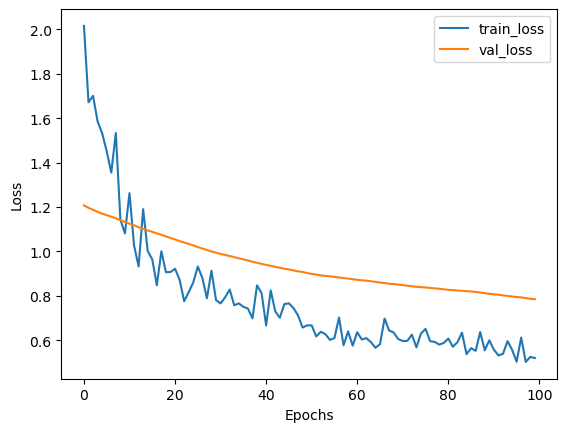

In [110]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4025/4025 [==============================] - 6s 2ms/step


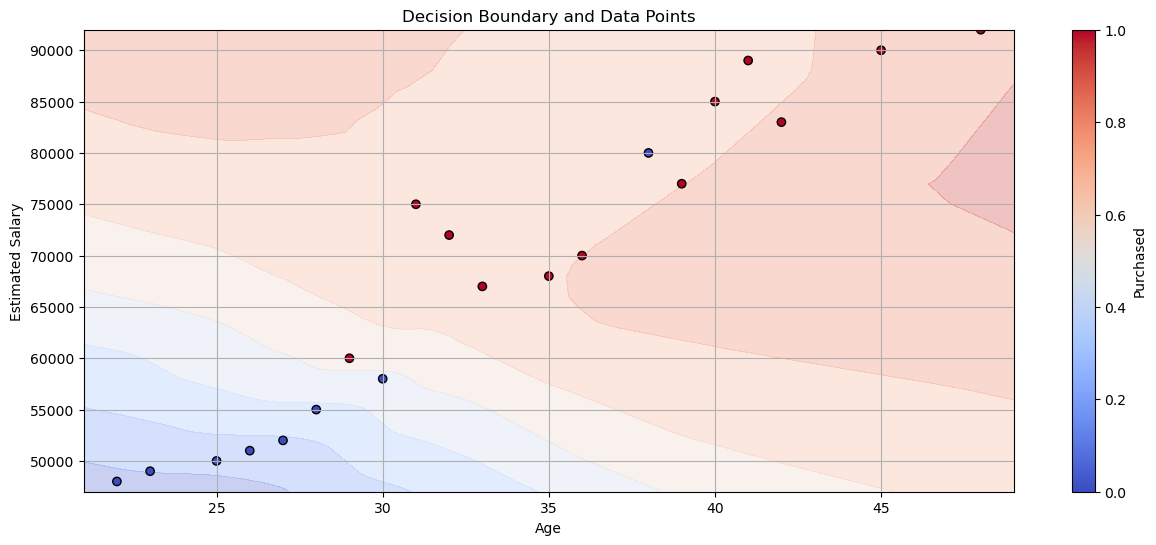

In [111]:
plt.figure(figsize=(15, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1000, X[:, 1].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 1000))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", marker="o", edgecolors='k')
plt.colorbar(label="Purchased")
plt.title("Decision Boundary and Data Points")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()

## REFERENCES

Logistic Regression Example using scikit-learn:

Logistic Regression 3-class Classifier

https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

Feedforward Neural Networks Introduction:

Introduction to Feedforward Deep Neural Networks

http://uc-r.github.io/feedforward_DNN

Comparison of Feed-Forward and Feedback Neural Networks:

Feed-Forward vs. Feedback Neural Networks: A Comparative Analysis

https://blog.paperspace.com/feed-forward-vs-feedback-neural-networks/

Logistic Regression Overview:

An Overview of Logistic Regression in Machine Learning

https://www.saedsayad.com/logistic_regression.htm